In [2]:
from skimage import io
filename = 'analyses/MDA231_stopper_1_c3.tif'
plate = io.imread(filename,as_grey=True)
image = plate

/opt/conda/envs/python3.7/lib/python3.7/site-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


# Test1: Failed 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [2]:
from scipy.spatial import Voronoi as voronoi

In [3]:
from skimage import io, filters, img_as_bool
from skimage import io, color, measure, draw, img_as_bool
# from skimage import data, filter, color
from skimage import feature
from skimage.viewer import ImageViewer

/opt/conda/envs/python3.7/lib/python3.7/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


In [4]:
filename = 'analyses/MDA231_stopper_1_c3.tif'
plate = io.imread(filename,as_grey=True)
image = plate
# image = img_as_bool(color.rgb2gray(io.imread(filename)))

/opt/conda/envs/python3.7/lib/python3.7/site-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


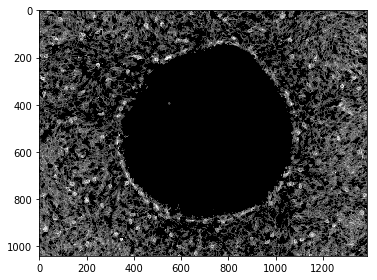

In [5]:
io.imshow(plate)

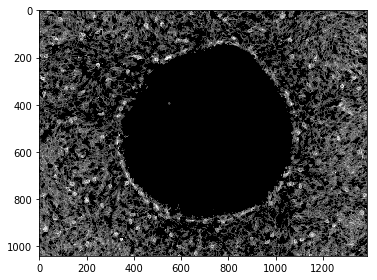

In [6]:
io.imshow(image)


In [7]:
from skimage.transform import hough_circle
from skimage.feature import peak_local_max
from skimage.draw import circle_perimeter

In [8]:
edges = feature.canny(image, sigma=3, low_threshold=10, high_threshold=50)

In [9]:
# Detect two radii
hough_radii = np.arange(15, 30, 2)
hough_res = hough_circle(edges, hough_radii)

In [10]:
centers = []
accums = []
radii = []

for radius, h in zip(hough_radii, hough_res):
    # For each radius, extract two circles
    peaks = peak_local_max(h, num_peaks=2)
    centers.extend(peaks - hough_radii.max())
    accums.extend(h[peaks[:, 0], peaks[:, 1]])
    radii.extend([radius, radius])

In [11]:
# Draw the most prominent 5 circles
image2 = color.gray2rgb(image)
for idx in np.argsort(accums)[::-1][:5]:
    center_x, center_y = centers[idx]
    radius = radii[idx]
    cx, cy = circle_perimeter(center_y, center_x, radius)
    image2[cy, cx] = (220, 20, 20)

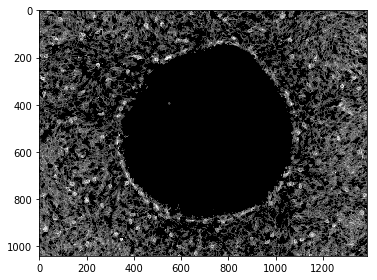

In [13]:
io.imshow(image2)

# Test 2:

In [4]:
from skimage import io, color, measure, draw, img_as_bool
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [3]:
filename = 'analyses/MDA231_stopper_1_c3.tif'
plate = io.imread(filename)
# image = plate

In [313]:
image = io.imread(filename,as_grey=True)
im2 = image>0.2
im2 = im2.astype(int)
regions = measure.regionprops(im2)
bubble = regions[0]
y0, x0 = bubble.centroid
r0 = bubble.major_axis_length / 2.
minx, miny, maxx, maxy = bubble.bbox
maxr = max(maxx,maxy)/2

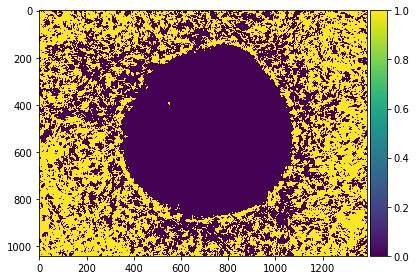

In [314]:
io.imshow(im2)

In [89]:
def cost(params):
    x0= params[0]
    y0 = params[1]
    r = params[2]
    coords = draw.circle(y0, x0, r, shape=image.shape)
    template = np.zeros_like(image) #set all values to be zero
    template[coords] = 1 
    penalty = sum(sum(template))
    return penalty*penalty-2*np.pi*r*r
#     return -np.sum(template == image)

In [56]:
# x0, y0, r = optimize.fmin(cost, (x0, y0, r))

array([1040., 1388.,  694.])

In [70]:
x0, y0, r = optimize.fminbound(cost, np.array([0, 0, 0]), np.array([maxx, maxy, maxr]))

ValueError: Optimisation bounds must be scalars or array scalars.

In [57]:
x0, y0, r

(-4.1663928932844364e+55, -3.6235169586496736e+55, 1.2175857300605515e+56)

In [ ]:
# def cost(params):
#     x0, y0, r = params
#     coords = draw.circle(y0, x0, r, shape=image.shape)
#     template = np.zeros_like(image)
#     template[coords] = 1
#     return -np.sum(template == image)

In [96]:
def cost(params):
    x0= params[0]
    y0 = params[1]
    r = params[2]
    coords = draw.circle(y0, x0, r, shape=image.shape)
    template = np.zeros_like(image) #set all values to be zero
    template[coords] = 1 
    penalty = sum(sum(template))
    return penalty*penalty-2*np.pi*r*r

In [ ]:
# matlab
# sum(masked_pixels)- penalty*(length(masked_pixels)-sum(masked_pixels));


In [182]:
im2

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 0, 0]])

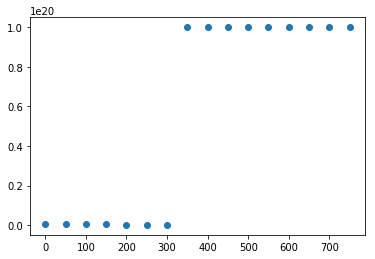

In [284]:
def cost(params):
    image = im2
    x0= params[0]
    y0 = params[1]
    r = params[2]
    coords = draw.circle(y0, x0, r, shape=image.shape)
    template = np.zeros_like(image) #set all values to be zero
    template[coords] = 1
    # values outside of the box should be penalized too
    if (x0+r >maxx) or (y0+r>maxy) or (x0-r <0) or (y0-r <0):
        return 1e20
    penalty = 1000000
    score = 2*np.pi*r*r - penalty*(np.sum(template == image)**2 - 2*np.pi*r*r)  
    return -score

    
#     penalty = np.sum(template == image)**2
    #We want to find the maximum area, hence - 2*np.pi*r*r
    # we also want to find the minimum amount of ovelap, hence penalty
#     return  - 2*np.pi*r*r + penalty

import matplotlib.pyplot as plt
x = [i for i in np.arange(0,800,50)]
y = [cost([x_opt,y_opt,i]) for i in x]
plt.scatter(x,y)

## Trying a new function

(array([], dtype=int64), array([], dtype=int64))
(array([466, 466, 466, ..., 574, 574, 574]), array([684, 685, 686, ..., 702, 703, 704]))
(array([411, 411, 411, ..., 629, 629, 629]), array([680, 681, 682, ..., 706, 707, 708]))
(array([356, 356, 356, ..., 684, 684, 684]), array([676, 677, 678, ..., 710, 711, 712]))
(array([301, 301, 301, ..., 739, 739, 739]), array([674, 675, 676, ..., 712, 713, 714]))
(array([246, 246, 246, ..., 794, 794, 794]), array([671, 672, 673, ..., 715, 716, 717]))
(array([191, 191, 191, ..., 849, 849, 849]), array([669, 670, 671, ..., 717, 718, 719]))
(array([136, 136, 136, ..., 904, 904, 904]), array([667, 668, 669, ..., 719, 720, 721]))
(array([ 81,  81,  81, ..., 959, 959, 959]), array([665, 666, 667, ..., 721, 722, 723]))
(array([  26,   26,   26, ..., 1014, 1014, 1014]), array([663, 664, 665, ..., 723, 724, 725]))
(array([   0,    0,    0, ..., 1039, 1039, 1039]), array([515, 516, 517, ..., 874, 875, 876]))
(array([   0,    0,    0, ..., 1039, 1039, 1039])

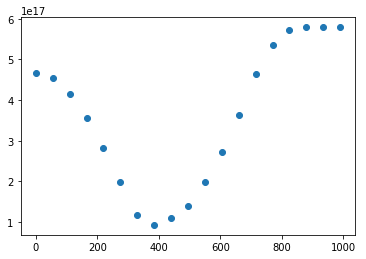

In [259]:
def cost(params):
    image = im2
    x0= params[0]
    y0 = params[1]
    r = params[2]
    coords = draw.circle(y0, x0, r, shape=image.shape)
    template = np.zeros_like(image) #set all values to be zero
    template[coords] = 1 
    penalty = 1000000
#     score = np.sum(template) - penalty*(len(template)- np.sum(template))
    
#     print('%g\t\t%g' % (2*np.pi*r*r, np.sum(template == image)**2))
print()
    score = 2*np.pi*r*r - penalty*(np.sum(template == image)**2 - 2*np.pi*r*r)  
    return -score
    
    
    
#     penalty = np.sum(template == image)**2
    #We want to find the maximum area, hence - 2*np.pi*r*r
    # we also want to find the minimum amount of ovelap, hence penalty
#     return  - 2*np.pi*r*r + penalty

import matplotlib.pyplot as plt
x = [i for i in np.arange(0,1000,55)]
y = [cost([x_opt,y_opt,i]) for i in x]
plt.scatter(x,y)

(1040, 1388)

In [287]:
x0 = im2.shape[1]/2
y0 = im2.shape[0]/2
r0 = im2.shape[1]/4

In [317]:
def cost(params):
    image = im2
    x0= params[0]
    y0 = params[1]
    r = params[2]
    coords = draw.circle(y0, x0, r, shape=image.shape)
    template = np.zeros_like(image) #set all values to be zero
    template[coords] = 1
    # values outside of the box should be penalized too
    if (x0+r >maxx) or (y0+r>maxy) or (x0-r <0) or (y0-r <0):
        return +1e20
    penalty = 100
    score = 2*np.pi*r*r - penalty*(np.sum(template == image)**2 - 2*np.pi*r*r)  
    return -score

In [320]:
bnds = ((0, maxx), (0, maxy), (0,2*maxr))
res = optimize.minimize(cost, x0=[x0, y0,x0/2], bounds=bnds)
res

      fun: 21898486759412.613
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([      0.,       0., -390625.])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 84
      nit: 0
   status: 2
  success: False
        x: array([691.25591905, 529.27572426, 345.62795953])

[691.2559190506428, 529.2757242641904, 345.6279595253214]


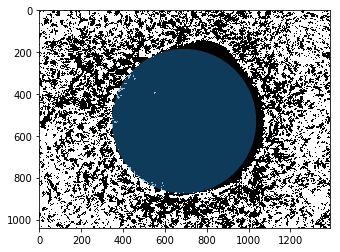

In [321]:
x_opt = res.x[0]
y_opt = res.x[1]
r_opt = res.x[2]
print([x_opt,y_opt,r_opt])
f, ax = plt.subplots()
circle = plt.Circle((x_opt, y_opt), r_opt, alpha = 0.5)
ax.imshow(im2, cmap='gray', interpolation='nearest')
ax.add_artist(circle)
plt.show()

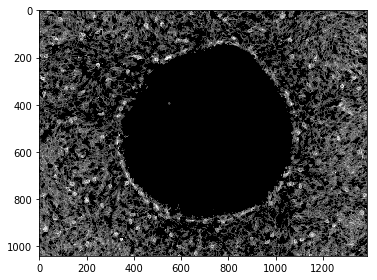

In [150]:
ax = io.imshow(image)

In [45]:
circle = plt.Circle((x0, y0), r)

In [73]:
r

962.1510084005195

In [74]:
x0

691.2559190506428

In [75]:
y0

529.2757242641904

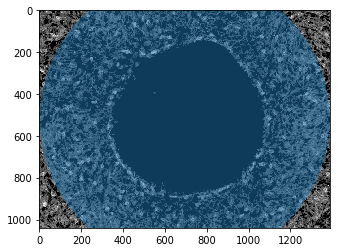

In [281]:
f, ax = plt.subplots()
circle = plt.Circle((x_opt, y_opt), r_opt, alpha = 0.5)
ax.imshow(image, cmap='gray', interpolation='nearest')
ax.add_artist(circle)
plt.show()